# Chap.11 実用的なディープラーニングを目指して

注意 Mac固有の問題回避のため、下記のセルを必ず実行してください

In [ ]:
# Macの問題回避
import os
import platform
if platform.system() == 'Darwin':
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
# 必要ライブラリの宣言
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings

warnings.filterwarnings('ignore')
rcParams['font.family'] = 'IPAexgothic'
# plt.style.use('ggplot')
plt.style.use('seaborn-darkgrid')
%matplotlib inline

## 11.1 フレームワークの利用

KerasによるNeural Network

In [4]:
# データ準備

# 変数定義

# D: 入力ノード数
from keras.utils import np_utils
from keras.datasets import mnist
D = 784

# H: 隠れ層のノード数
H = 128

# 分類クラス数
num_classes = 10

# Kerasの関数でデータの読み込み
(x_train_org, y_train), (x_test_org, y_test) \
    = mnist.load_data()

# 入力データの加工 (次元を1次元に)
x_train = x_train_org.reshape(-1, D) / 255.0
x_test = x_test_org.reshape((-1, D)) / 255.0

# 正解データの加工 (One Hot Vectorに)
y_train_ohe =\
    np_utils.to_categorical(y_train, num_classes)
y_test_ohe =\
    np_utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 1s 0us/step


In [5]:
# モデルの定義

# 必要ライブラリのロード
from keras.models import Sequential
from keras.layers import Dense

# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu'))

# 出力層
model.add(Dense(num_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

2022-06-05 23:01:38.173575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# 学習

# 学習の単位
batch_size = 512

# 繰り返し回数
nb_epoch = 50

# モデルの学習
history1 = model.fit(
    x_train,
    y_train_ohe,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 1s 9ms/step - loss: 1.9886 - accuracy: 0.4450 - val_loss: 1.6257 - val_accuracy: 0.6637
Epoch 2/50
118/118 [==============================] - 1s 5ms/step - loss: 1.3099 - accuracy: 0.7307 - val_loss: 1.0131 - val_accuracy: 0.7861
Epoch 3/50
118/118 [==============================] - 1s 7ms/step - loss: 0.8735 - accuracy: 0.8041 - val_loss: 0.7274 - val_accuracy: 0.8311
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.6746 - accuracy: 0.8368 - val_loss: 0.5901 - val_accuracy: 0.8558
Epoch 5/50
118/118 [==============================] - 1s 7ms/step - loss: 0.5705 - accuracy: 0.8561 - val_loss: 0.5120 - val_accuracy: 0.8713
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 0.5072 - accuracy: 0.8679 - val_loss: 0.4631 - val_accuracy: 0.8800
Epoch 7/50
118/118 [==============================] - 1s 6ms/step - loss: 0.4646 - accuracy: 0.8758 - val_loss: 0.4275 - val_accuracy: 0.8869
Epoch 

## 11.4 数値微分

In [7]:
import numpy as np

#  ネイピア数を底とする指数関数の定義


def f(x):
    return np.exp(x)


# 微少な数 hの定義
h = 0.001

# f'(0)の近似計算
# f'(0) = f(0) = 1に近い値になるはず
diff = (f(0 + h) - f(0 - h))/(2 * h)

# 結果の確認
print(diff)

1.0000001666666813


## 11.5 高度な学習法

SGD

In [8]:
# 必要ライブラリのロード
from keras.models import Sequential
from keras.layers import Dense

# 学習の単位
batch_size = 512

# 繰り返し回数
nb_epoch = 50

In [9]:
# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu',
          kernel_initializer='he_normal', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 出力層
model.add(Dense(num_classes, activation='softmax',
          kernel_initializer='he_normal'))

In [10]:
# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# モデルの学習
history1 = model.fit(
    x_train,
    y_train_ohe,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 1s 7ms/step - loss: 1.8136 - accuracy: 0.4955 - val_loss: 1.3072 - val_accuracy: 0.7024
Epoch 2/50
118/118 [==============================] - 1s 5ms/step - loss: 1.0391 - accuracy: 0.7661 - val_loss: 0.7905 - val_accuracy: 0.8244
Epoch 3/50
118/118 [==============================] - 1s 5ms/step - loss: 0.7079 - accuracy: 0.8334 - val_loss: 0.5944 - val_accuracy: 0.8568
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.5676 - accuracy: 0.8576 - val_loss: 0.5005 - val_accuracy: 0.8739
Epoch 5/50
118/118 [==============================] - 1s 6ms/step - loss: 0.4930 - accuracy: 0.8722 - val_loss: 0.4450 - val_accuracy: 0.8835
Epoch 6/50
118/118 [==============================] - 1s 7ms/step - loss: 0.4467 - accuracy: 0.8812 - val_loss: 0.4091 - val_accuracy: 0.8909
Epoch 7/50
118/118 [==============================] - 1s 6ms/step - loss: 0.4148 - accuracy: 0.8877 - val_loss: 0.3827 - val_accuracy: 0.8966
Epoch 

RMSProp

In [ ]:
# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu',
          kernel_initializer='he_normal', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 出力層
model.add(Dense(num_classes, activation='softmax',
          kernel_initializer='he_normal'))

In [11]:
# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# モデルの学習
history2 = model.fit(
    x_train,
    y_train_ohe,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 2s 8ms/step - loss: 0.1946 - accuracy: 0.9437 - val_loss: 0.2119 - val_accuracy: 0.9359
Epoch 2/50
118/118 [==============================] - 1s 6ms/step - loss: 0.1379 - accuracy: 0.9598 - val_loss: 0.1264 - val_accuracy: 0.9599
Epoch 3/50
118/118 [==============================] - 1s 6ms/step - loss: 0.1060 - accuracy: 0.9686 - val_loss: 0.1136 - val_accuracy: 0.9663
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.0854 - accuracy: 0.9748 - val_loss: 0.0934 - val_accuracy: 0.9698
Epoch 5/50
118/118 [==============================] - 1s 7ms/step - loss: 0.0713 - accuracy: 0.9781 - val_loss: 0.0945 - val_accuracy: 0.9724
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0799 - val_accuracy: 0.9755
Epoch 7/50
118/118 [==============================] - 1s 6ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0981 - val_accuracy: 0.9702
Epoch 

Momentum

In [13]:
# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu',
          kernel_initializer='he_normal', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 出力層
model.add(Dense(num_classes, activation='softmax',
          kernel_initializer='he_normal'))


In [14]:
# モデルのコンパイル
from keras import optimizers

sgd = optimizers.gradient_descent_v2.SGD(momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# モデルの学習
history3 = model.fit(
    x_train,
    y_train_ohe,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 1s 9ms/step - loss: 0.8551 - accuracy: 0.7530 - val_loss: 0.3528 - val_accuracy: 0.8960
Epoch 2/50
118/118 [==============================] - 1s 5ms/step - loss: 0.3272 - accuracy: 0.9051 - val_loss: 0.2783 - val_accuracy: 0.9181
Epoch 3/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2716 - accuracy: 0.9212 - val_loss: 0.2427 - val_accuracy: 0.9293
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2390 - accuracy: 0.9315 - val_loss: 0.2185 - val_accuracy: 0.9355
Epoch 5/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2141 - accuracy: 0.9383 - val_loss: 0.1977 - val_accuracy: 0.9416
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 0.1937 - accuracy: 0.9446 - val_loss: 0.1801 - val_accuracy: 0.9451
Epoch 7/50
118/118 [==============================] - 1s 6ms/step - loss: 0.1777 - accuracy: 0.9495 - val_loss: 0.1681 - val_accuracy: 0.9490
Epoch 

グラフ表示による比較

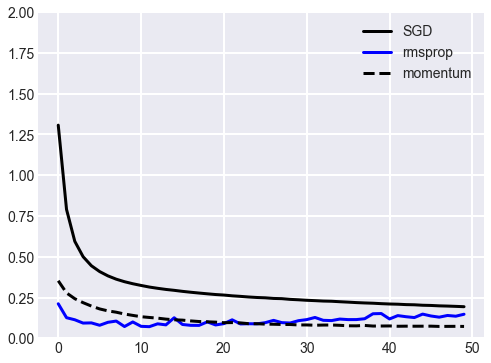

In [15]:
# 学習曲線の表示 (損失関数値)
plt.figure(figsize=(8, 6))
plt.plot(history1.history['val_loss'], label='SGD', lw=3, c='k')
plt.plot(history2.history['val_loss'], label='rmsprop', lw=3, c='b')
plt.plot(history3.history['val_loss'],
         label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0, 2)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

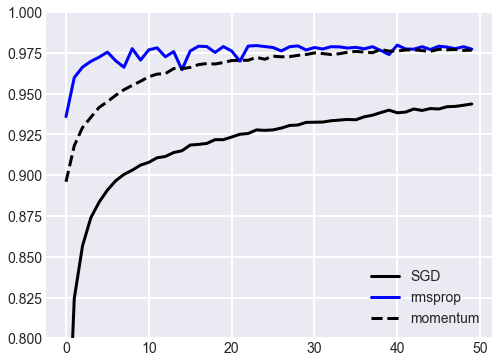

In [16]:
# 学習曲線の表示 (精度)

plt.figure(figsize=(8, 6))
plt.plot(history1.history['val_accuracy'], label='SGD', lw=3, c='k')
plt.plot(history2.history['val_accuracy'], label='rmsprop', lw=3, c='b')
plt.plot(history3.history['val_accuracy'],
         label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0.8, 1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()


## 11.6 過学習対策

正則化

In [17]:
# 正解データのデータ数
div = 8

# 近似多項式の次元
dim = 8

# y = -x*4 + x**3 -3x**2 + 8x -7
p = [-1, 1, -3, 8, -7]

# xの定義域 [-2, 1]
xMin = -2
xMax = 1

$f(x) = -x^4 + x^3 - 3x^2 + 8x -7 + N(0, 5)$

In [18]:
# x : xMin と xManの間をdiv個に分割したベクトル
x = np.linspace(xMin, xMax, num=div)

# xx : xを10倍細かい間隔で分割したベクトル
xx = np.linspace(xMin, xMax, num=div*10)

# y, yy: x, xxそれぞれのベクトルに対して多項式の値を計算したベクトル
y = np.polyval(p, x)
yy = np.polyval(p, xx)

# z: yに正規分布のノイズを加える。これを正解データとする
z = y + 5 * np.random.randn(div)

In [19]:
# ベクトル表示用関数
def print_fix(x):
    [print('{:.3f}'.format(n)) for n in x]

# モデルを引数として、多項式の係数を表示する関数
def print_fix_model(m):
    w = m.coef_.tolist()
    w[0] = m.intercept_
    print_fix(w)

In [20]:
# 多項式行列を作成し、モデルの入力変数とする

# x**nのベクトル計算用関数
def f(x):
    return [x**i for i in range(dim)]


# X : xベクトルから多項式二次元配列を作ったもの
X = [f(x0) for x0 in x]

# XX : xxベクトル多項式二次元配列を作ったもの
XX = [f(x0) for x0 in xx]

In [21]:
# 線形モデルライブラリのロード
from sklearn.linear_model import LinearRegression

# モデルの初期化、学習
model = LinearRegression().fit(X, z)

# 予測値の取得
yy_pred = model.predict(XX)

In [22]:
# Ridgeモデルラブラリのロード
from sklearn.linear_model import Ridge

# モデルの生成、学習
#model2 = Ridge(alpha=5).fit(X, z)
model2 = Ridge(alpha=0.5).fit(X, z)

In [23]:
# 予測値の取得
yy_pred2 = model2.predict(XX)

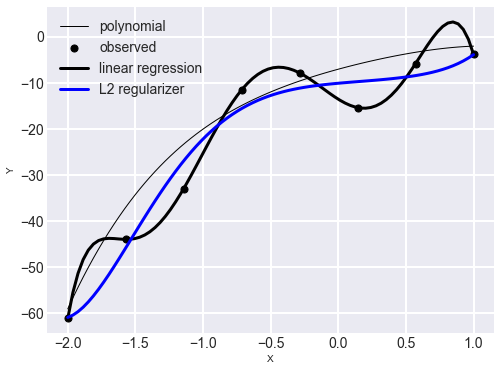

In [24]:
# グラフ表示
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, label='polynomial', lw=1, c='k')
plt.scatter(x, z, label='observed', s=50, c='k')
plt.plot(xx, yy_pred, label='linear regression', lw=3, c='k')
plt.plot(xx, yy_pred2, label='L2 regularizer', lw=3, c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()